In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Load the data (replace 'iphones.csv' with your file path)
df = pd.read_csv(r'C:\Users\user\Desktop\data analysis project\datasets\Mobiles Dataset (2025).csv', encoding='ISO-8859-1')
# 1. Remove duplicates
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()



,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,nched Price (Pakistan),nched Price (India),nched Price (China),nched Price (USA),nched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"224,999","79,999","5,799",799,"2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"234,999","84,999","6,099",849,"2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"244,999","89,999","6,499",899,"3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"249,999","89,999","6,199",899,"3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"259,999","94,999","6,499",949,"3,399",2024


In [7]:
# 2. Process Back Camera column
def process_back_camera(cam_str):
    if pd.isna(cam_str):
        return pd.Series([None, None])
    cam_str = cam_str.replace(",", "+")  # Replace commas with +
    cam_str = ''.join([c for c in cam_str if c.isdigit() or c == '+'])  # Keep digits and +
    camera_parts = cam_str.split('+')
    numeric_cams = [int(x) for x in camera_parts if x.isdigit()]
    if not numeric_cams:
        return pd.Series([None, None])
    max_cam = max(numeric_cams)
    secondary_total = sum([x for x in numeric_cams if x != max_cam])
    return pd.Series([max_cam, secondary_total if secondary_total > 0 else None])

df[['Main Back Camera', 'Secondary Cameras']] = df['Back Camera'].apply(process_back_camera)
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,nched Price (Pakistan),nched Price (India),nched Price (China),nched Price (USA),nched Price (Dubai),Launched Year,Main Back Camera,Secondary Cameras
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"224,999","79,999","5,799",799,"2,799",2024,48.0,NaN
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"234,999","84,999","6,099",849,"2,999",2024,48.0,NaN
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"244,999","89,999","6,499",899,"3,199",2024,48.0,NaN
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"249,999","89,999","6,199",899,"3,199",2024,48.0,NaN
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"259,999","94,999","6,499",949,"3,399",2024,48.0,NaN


In [8]:
# 2. Process Back Camera column
def process_front_camera(cam_str):
    if pd.isna(cam_str):
        return pd.Series([None, None])
    cam_str = cam_str.replace(",", "+")  # Replace commas with +
    cam_str = ''.join([c for c in cam_str if c.isdigit() or c == '+'])  # Keep digits and +
    camera_parts = cam_str.split('+')
    numeric_cams = [int(x) for x in camera_parts if x.isdigit()]
    if not numeric_cams:
        return pd.Series([None, None])
    max_cam = max(numeric_cams)
    secondary_total = sum([x for x in numeric_cams if x != max_cam])
    return pd.Series([max_cam, secondary_total if secondary_total > 0 else None])

df[['Main Front Camera', 'Second Cameras']] = df['Front Camera'].apply(process_back_camera)
df.head()


,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,nched Price (Pakistan),nched Price (India),nched Price (China),nched Price (USA),nched Price (Dubai),Launched Year,Main Back Camera,Secondary Cameras,Main Front Camera,Second Cameras
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"224,999","79,999","5,799",799,"2,799",2024,48.0,NaN,12.0,NaN
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"234,999","84,999","6,099",849,"2,999",2024,48.0,NaN,12.0,NaN
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"244,999","89,999","6,499",899,"3,199",2024,48.0,NaN,12.0,NaN
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"249,999","89,999","6,199",899,"3,199",2024,48.0,NaN,12.0,NaN
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"259,999","94,999","6,499",949,"3,399",2024,48.0,NaN,12.0,NaN


In [9]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
numeric_columns = [col for col in df.columns if col not in ['Company', 'Model Name', 'Processor', 'Launched Year', 'Front Cam', 'Back Cam Min', 'Back Cam Max']]

for col in numeric_columns:
    # Check if the column is of object (string) type before applying .str
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col].str.replace(r'[^\d.]', '', regex=True), errors='coerce')
    else:
        # If the column is already numeric, convert it directly (no need for .str)
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Save the cleaned data to a new CSV
df.head()


,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,nched Price (Pakistan),nched Price (India),nched Price (China),nched Price (USA),nched Price (Dubai),Launched Year,Main Back Camera,Secondary Cameras,Main Front Camera,Second Cameras
0,NaN,iPhone 16 128GB,174.0,6.0,12.0,48.0,A17 Bionic,3600,6.1,224999.0,79999,5799,799.0,2799,2024,48.0,NaN,12.0,NaN
1,NaN,iPhone 16 256GB,174.0,6.0,12.0,48.0,A17 Bionic,3600,6.1,234999.0,84999,6099,849.0,2999,2024,48.0,NaN,12.0,NaN
2,NaN,iPhone 16 512GB,174.0,6.0,12.0,48.0,A17 Bionic,3600,6.1,244999.0,89999,6499,899.0,3199,2024,48.0,NaN,12.0,NaN
3,NaN,iPhone 16 Plus 128GB,203.0,6.0,12.0,48.0,A17 Bionic,4200,6.7,249999.0,89999,6199,899.0,3199,2024,48.0,NaN,12.0,NaN
4,NaN,iPhone 16 Plus 256GB,203.0,6.0,12.0,48.0,A17 Bionic,4200,6.7,259999.0,94999,6499,949.0,3399,2024,48.0,NaN,12.0,NaN


In [10]:
# Check for missing values
print(df.isnull().sum())

# Display basic statistics
print(df.describe())

# Check data types
print(df.dtypes)

Company Name              915
Model Name                  0
Mobile Weight               0
RAM                         0
Front Camera                0
Back Camera                 0
Processor                   0
Battery Capacity            0
Screen Size                 4
nched Price (Pakistan)      1
nched Price (India)         0
nched Price (China)         0
nched Price (USA)           0
nched Price (Dubai)         0
Launched Year               0
Main Back Camera            0
Secondary Cameras         585
Main Front Camera           0
Second Cameras            905
dtype: int64
       Company Name  Mobile Weight         RAM  Front Camera   Back Camera  \
count           0.0     915.000000  915.000000    915.000000  9.150000e+02   
mean            NaN     228.914098    9.546448     28.909945  3.766197e+04   
std             NaN     106.164933   37.713568     74.727479  2.543817e+05   
min             NaN     135.000000    1.000000      2.000000  5.000000e+00   
25%             NaN     185

In [14]:

print(df['Battery Capacity'].dtype)
print(df['Battery Capacity'].head())
# Convert to string
df['Battery Capacity'] = df['Battery Capacity'].astype(str)
# Remove non-numeric characters
df['Battery Capacity'] = df['Battery Capacity'].str.replace(r'[^\d]', '', regex=True)
# Convert to numeric, coercing errors to NaN
df['Battery Capacity'] = pd.to_numeric(df['Battery Capacity'], errors='coerce')

int64
0    3600
1    3600
2    3600
3    4200
4    4200
Name: Battery Capacity, dtype: int64


In [26]:
# 4. Convert launch prices from other countries to USD using approximate exchange rates
# Define conversion rates
conversion_rates = {
    'nched Price (India)': 0.012,     # INR to USD
    'nched Price (China)': 0.14,      # CNY to USD
    'nched Price (Pakistan)': 0.0036, # PKR to USD
    'nched Price (Dubai)': 0.27       # AED to USD
}
# Convert prices and create new USD columns
for col, rate in conversion_rates.items():
    # Remove currency symbols and commas before converting
    df[col] = df[col].astype(str).str.replace(r'[^\d.]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[f'{col} (USD)'] = df[col] * rate

# Preview key columns
print(df[['Model Name', 'Back Camera', 'Main Back Camera', 'Secondary Cameras', 'Battery Capacity'] + [f'{k} (USD)' for k in conversion_rates.keys()]].head())

# Optional: Save the cleaned data
df.to_csv(r"C:\Users\user\Desktop\data analysis project\datasets""Cleaned_Mobile_Dataset.csv", index=False)

             Model Name  Back Camera  Main Back Camera  Secondary Cameras  \
0       iPhone 16 128GB         48.0              48.0                NaN   
1       iPhone 16 256GB         48.0              48.0                NaN   
2       iPhone 16 512GB         48.0              48.0                NaN   
3  iPhone 16 Plus 128GB         48.0              48.0                NaN   
4  iPhone 16 Plus 256GB         48.0              48.0                NaN   

   Battery Capacity  nched Price (India) (USD)  nched Price (China) (USD)  \
0              3600                    959.988                     811.86   
1              3600                   1019.988                     853.86   
2              3600                   1079.988                     909.86   
3              4200                   1079.988                     867.86   
4              4200                   1139.988                     909.86   

   nched Price (Pakistan) (USD)  nched Price (Dubai) (USD)  
0            

In [24]:
# Group by Model Name and calculate average features
import os
import sys
model_summary = df.groupby('Model Name').agg({
    'RAM': 'mean',
    'Front Camera':'mean',
    'Main Back Camera': 'mean',
    'Battery Capacity': 'mean',
    'nched Price (India)': 'mean'
}).sort_values(by='nched Price (India)',ascending=False)

print("Top 5 Most Expensive Models by Average Price (USD):")
print(model_summary.head())



Top 5 Most Expensive Models by Average Price (USD):
                RAM  Front Camera  Main Back Camera  Battery Capacity  \
Model Name                                                              
Mate XT 512GB  12.0          13.0              50.0            5000.0   
Mate XT 256GB  12.0          13.0              50.0            5000.0   
Mate X2         8.0          16.0              50.0            4500.0   
Mate X3        12.0           8.0              50.0            4800.0   
Mate X6        12.0           8.0              50.0            4800.0   

               nched Price (India)  
Model Name                          
Mate XT 512GB             274999.0  
Mate XT 256GB             259999.0  
Mate X2                   249999.0  
Mate X3                   249999.0  
Mate X6                   249999.0  


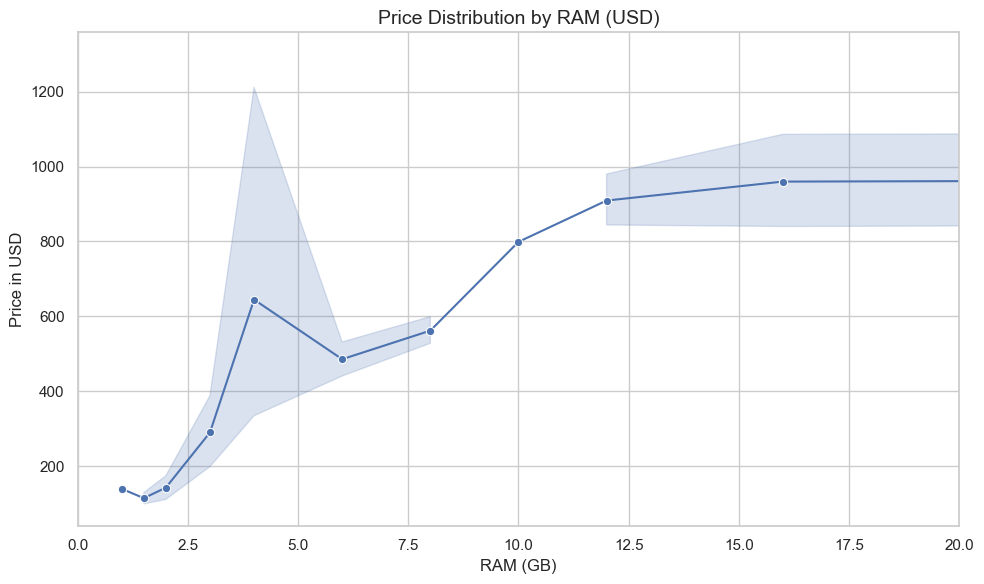

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# 1. Price distribution by RAM
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='RAM', y='nched Price (USA)', marker='o')
plt.title('Price Distribution by RAM (USD)', fontsize=14)
plt.xlabel('RAM (GB)')
plt.ylabel('Price in USD')
plt.xticks(rotation=0)
plt.xlim(0, 20)
plt.tight_layout()
plt.show()



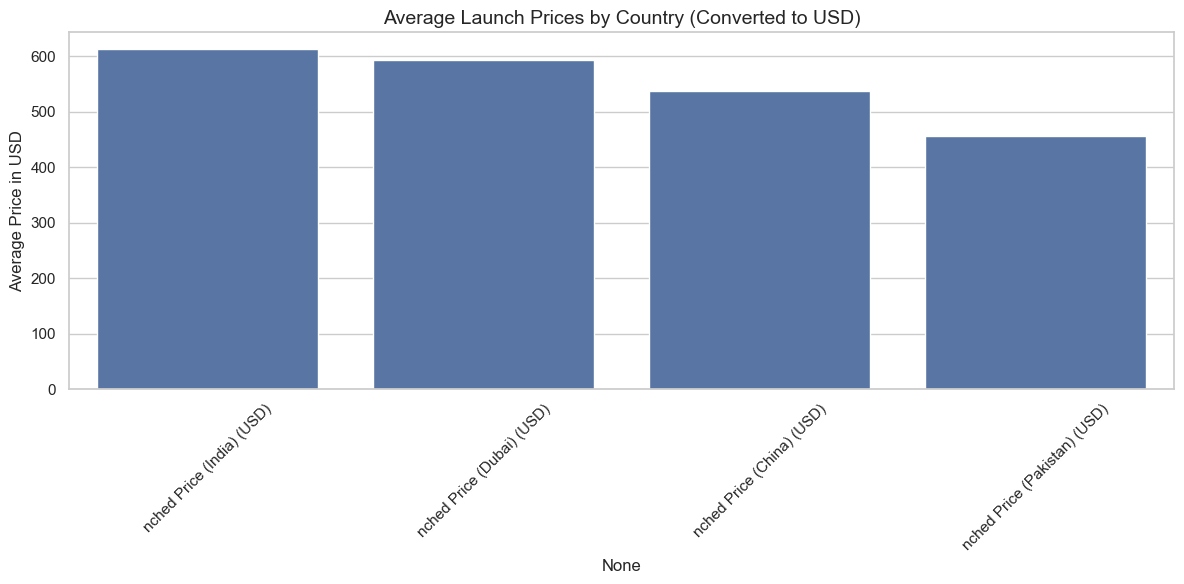

In [31]:
# 4. Launch Price Comparison by Country
plt.figure(figsize=(12, 6))
price_cols = [col for col in df.columns if "(USD)" in col]
df_mean = df[price_cols].mean().sort_values(ascending=False)
sns.barplot(x=df_mean.index, y=df_mean.values)
plt.title('Average Launch Prices by Country (Converted to USD)', fontsize=14)
plt.ylabel('Average Price in USD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

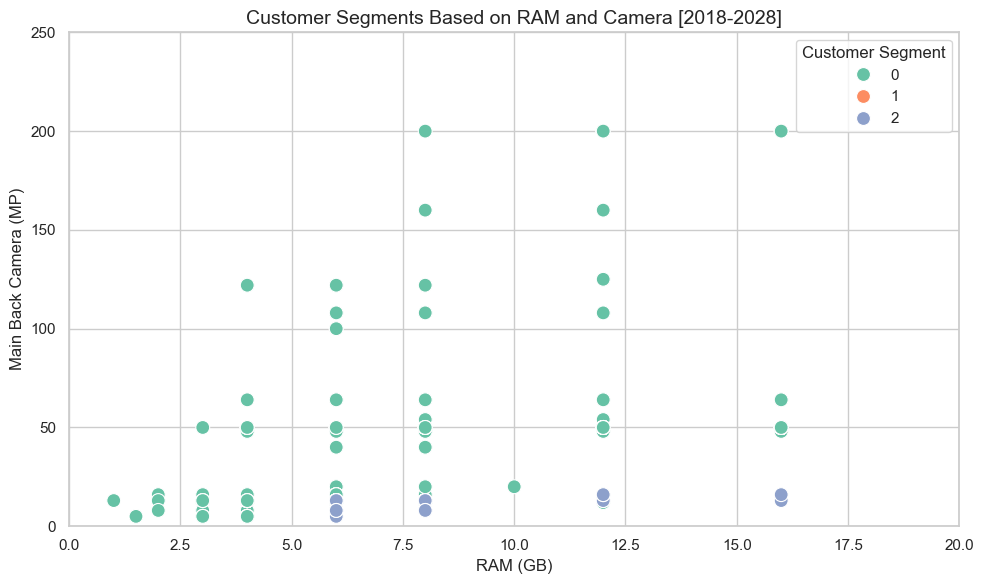

In [50]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# 2. Select features for clustering

features = df[['RAM', 'Main Back Camera', 'Battery Capacity', 'nched Price (USA)']].dropna()

# 3. Run KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features)

# 4. Assign clusters to filtered dataframe
df.loc[features.index, 'Customer Segment'] = clusters
df['Customer Segment'] = df['Customer Segment'].fillna(-1).astype(int)

# 5. Visualize clusters - RAM vs Back Camera with restricted ranges
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RAM', y='Main Back Camera', hue='Customer Segment', palette='Set2', s=100)
plt.title('Customer Segments Based on RAM and Camera [2018-2028]', fontsize=14)
plt.xlabel('RAM (GB)')
plt.ylabel('Main Back Camera (MP)')
plt.xlim(0, 20)  # Restrict RAM to 0-20 GB
plt.ylim(0, 250)  # Restrict Main Back Camera to 0-250 MP
plt.grid(True)
plt.tight_layout()
plt.show()

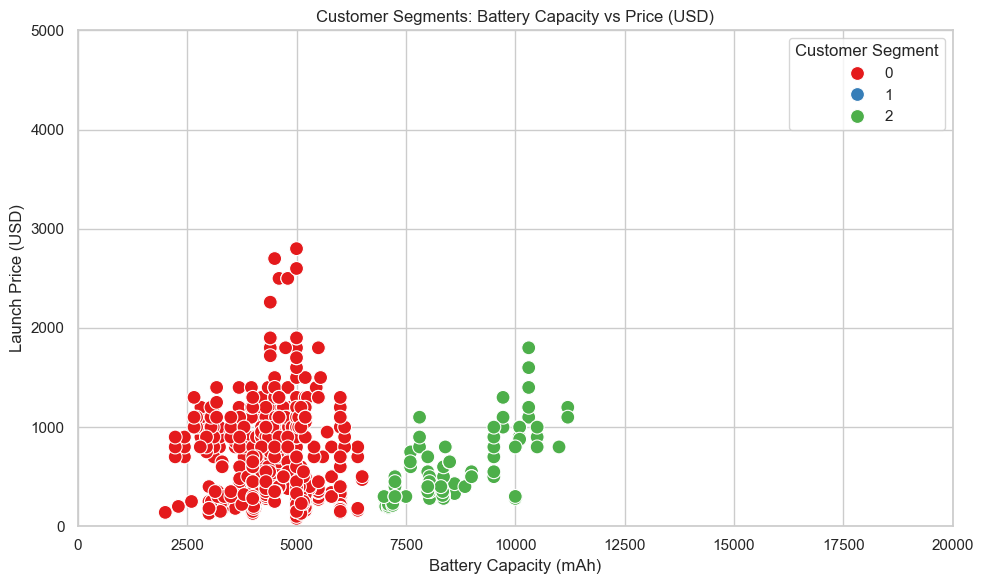

In [48]:
# 5. Visualize clusters - Battery vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Battery Capacity', y='nched Price (USA)', hue='Customer Segment', palette='Set1', s=100)
plt.title('Customer Segments: Battery Capacity vs Price (USD)')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Launch Price (USD)')
plt.xlim(0, 20000)  # Restrict RAM to 0-20 GB
plt.ylim(0, 5000) 
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
# Group by Model Name
model_summary = df.groupby('Model Name').agg({
    'RAM': 'mean',
    'Main Back Camera': 'mean',
    'Battery Capacity': 'mean',
    'nched Price (USA)': 'mean'
}).sort_values(by='nched Price (USA)', ascending=False)

# Show top 10 most expensive models
print("Top 10 Most Expensive Models by Average Launch Price (USD):")
print(model_summary.head(10))

Top 10 Most Expensive Models by Average Launch Price (USD):
                       RAM  Main Back Camera  Battery Capacity  \
Model Name                                                       
T21                    4.0               8.0            8200.0   
Mate XT 512GB         12.0              50.0            5000.0   
Mate X2                8.0              50.0            4500.0   
Mate XT 256GB         12.0              50.0            5000.0   
Mate X6               12.0              50.0            4800.0   
Mate X3               12.0              50.0            4800.0   
Mate Xs 2              8.0              50.0            4600.0   
Galaxy Z Fold6 1TB    12.0              50.0            4400.0   
Galaxy Z Fold6 256GB  12.0              50.0            4400.0   
Magic V2              12.0              50.0            5000.0   

                      nched Price (USA)  
Model Name                               
T21                             39622.0  
Mate XT 512GB        

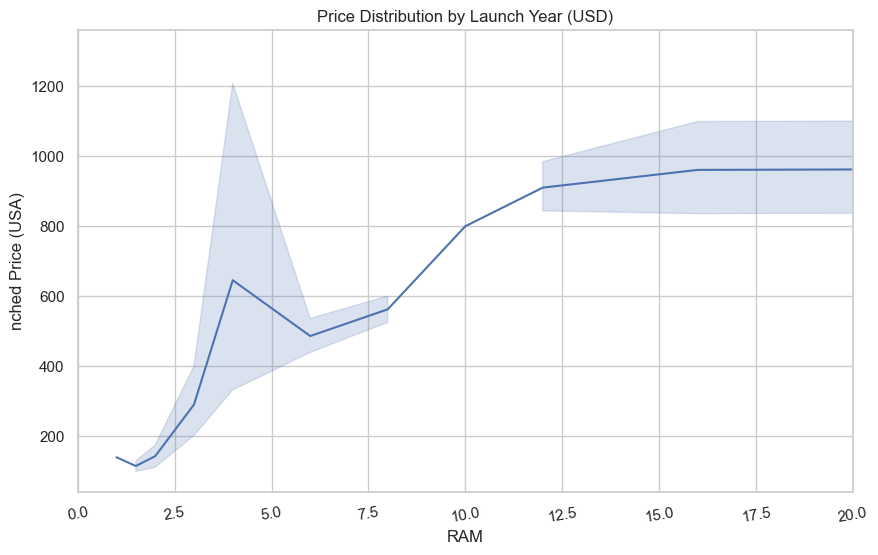

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame for demonstration (replace this with your actual DataFrame)

# Plot price distribution (e.g., in USD if available)
plt.figure(figsize=(10, 6))
sns.lineplot(x='RAM', y='nched Price (USA)', data=df)
plt.title('Price Distribution by Launch Year (USD)')
plt.xticks(rotation=10)

# Set x-axis limits
plt.xlim(0, 20)

plt.show()



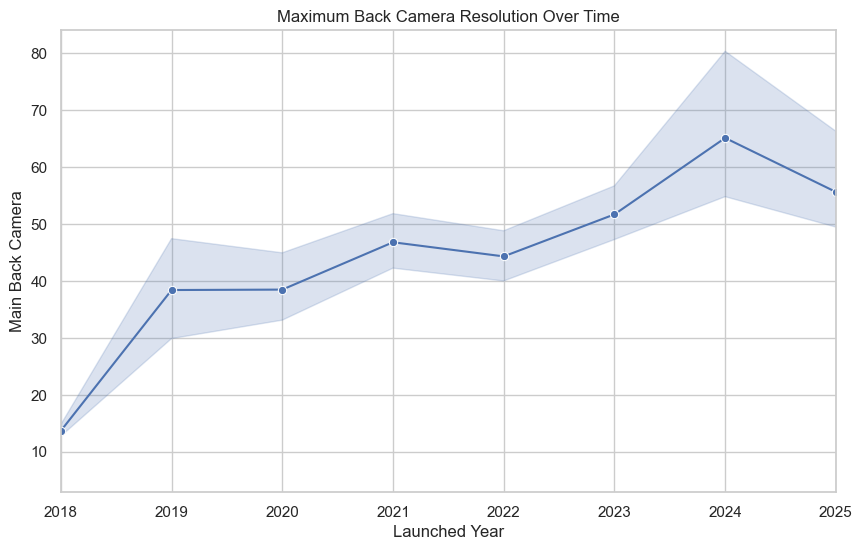

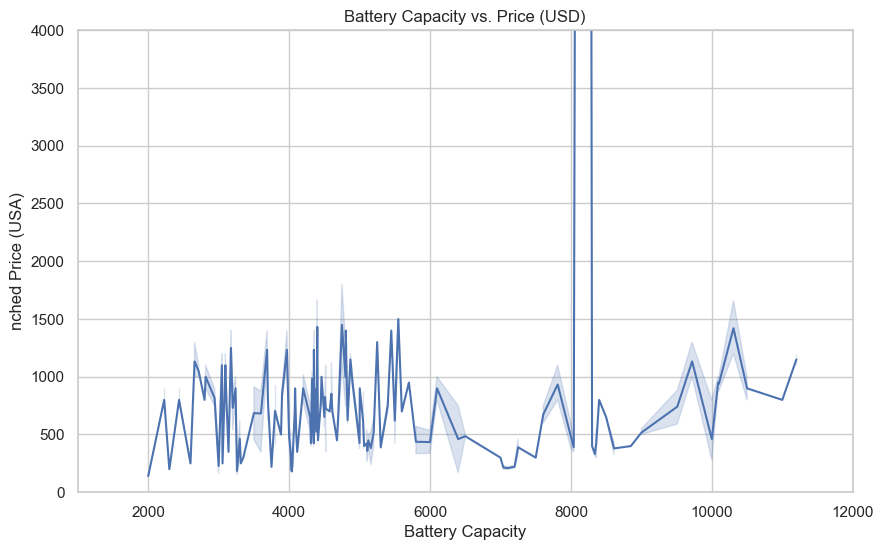

In [59]:
# Plot Back Cam Max vs. Launch Year
plt.figure(figsize=(10, 6))
sns.lineplot(x='Launched Year', y='Main Back Camera', data=df, marker='o')
plt.title('Maximum Back Camera Resolution Over Time')
# Set x-axis limits
plt.xlim(2018,2025)
plt.show()

# Plot Battery vs. Price
plt.figure(figsize=(10, 6))
sns.lineplot(x='Battery Capacity', y='nched Price (USA)', data=df)
plt.title('Battery Capacity vs. Price (USD)')
plt.ylim(0, 4000)
plt.xlim(1000, 12000)
plt.show()

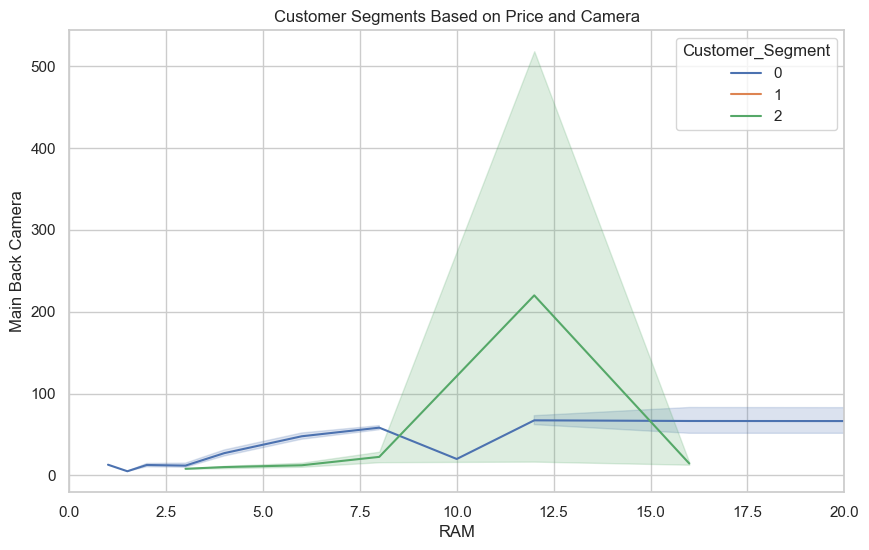

In [62]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select features for clustering and keep track of the index
features = df[['RAM', 'Main Back Camera', 'Battery Capacity', 'nched Price (USA)']].dropna()

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features)

# Create a Series with the clusters, using the index of 'features'
cluster_series = pd.Series(clusters, index=features.index)

# Map the clusters back to the original DataFrame using the index
df['Customer_Segment'] = df.index.map(cluster_series)

# Fill any missing values (NaN) in Customer_Segment with a default value (e.g., -1 for unassigned)
df['Customer_Segment'] = df['Customer_Segment'].fillna(-1).astype(int)

# Visualize clusters (only for rows where clusters exist, i.e., non-NaN in features)
plt.figure(figsize=(10, 6))
sns.lineplot(x='RAM', y='Main Back Camera', hue='Customer_Segment', data=df, palette='deep')
plt.title('Customer Segments Based on Price and Camera')
plt.xlim(0, 20)
plt.show()

🔝 Top 10 Most Common Processors:
Processor
Snapdragon 8 Gen 2         30
MediaTek Helio G99         21
MediaTek Dimensity 810     20
MediaTek Helio G85         19
Snapdragon 8 Gen 3         19
A15 Bionic                 18
A16 Bionic                 18
Snapdragon 8 Gen 1         16
MediaTek Dimensity 700     15
MediaTek Dimensity 8200    14
Name: count, dtype: int64

📊 Average Specs by Processor:
                                 RAM  Main Back Camera  Battery Capacity  \
Processor                                                                  
Unisoc T612                 4.000000              29.0       6600.000000   
Kirin 9000 5G               8.000000              50.0       4500.000000   
MediaTek Dimensity 9200+   12.000000              64.0       5500.000000   
Kirin 9010                 12.400000              65.0       4990.000000   
Snapdragon 8+ Gen 1 4G    276.666667              49.0       4781.666667   

                          nched Price (USA)  
Processor            

C:\Users\user\AppData\Local\Temp\ipykernel_2108\439846619.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=processor_stats.reset_index().head(10), x='Processor', y='nched Price (USA)', palette="coolwarm")
C:\Users\user\AppData\Local\Temp\ipykernel_2108\439846619.py:19: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\user\Desktop\data analysis project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


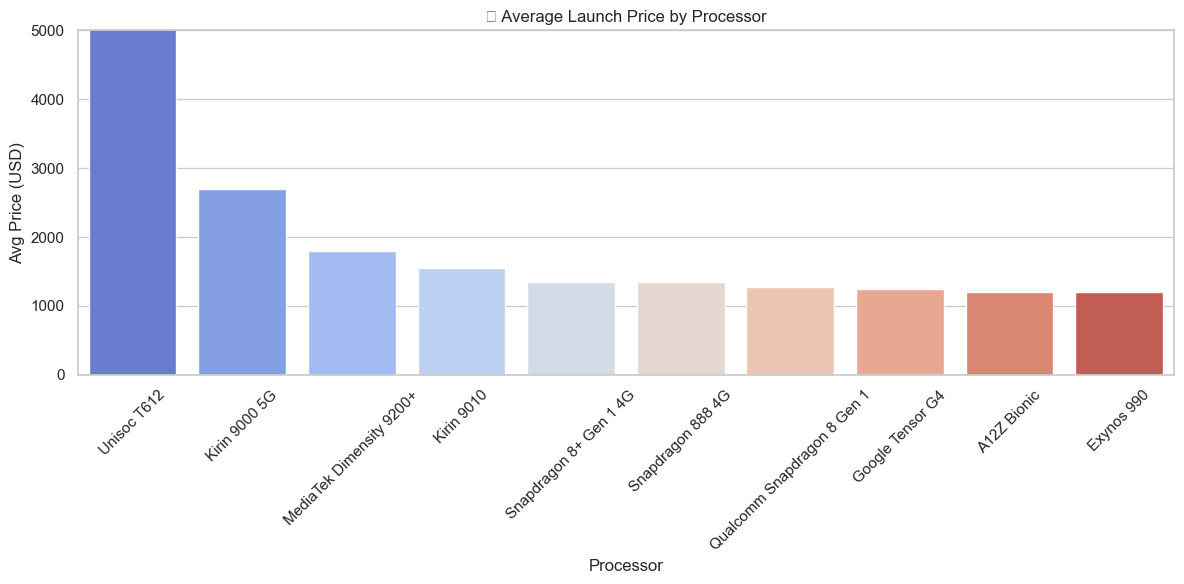

C:\Users\user\AppData\Local\Temp\ipykernel_2108\439846619.py:30: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\user\Desktop\data analysis project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


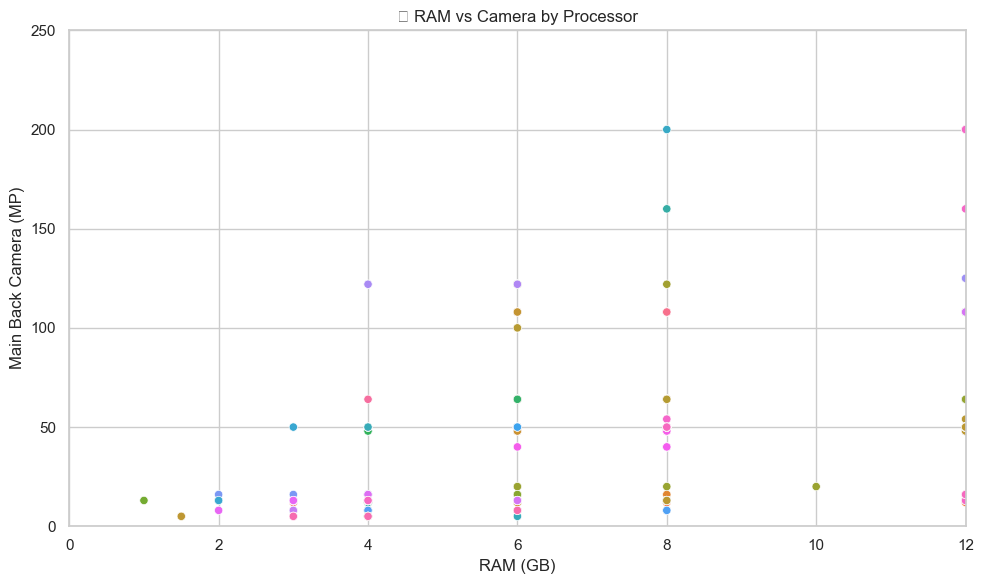

In [65]:


# Assuming df is your cleaned DataFrame
# 1. Count most common processors
top_processors = df['Processor'].value_counts().head(10)
print("🔝 Top 10 Most Common Processors:")
print(top_processors)

# 2. Average specs by processor
processor_stats = df.groupby('Processor')[['RAM', 'Main Back Camera', 'Battery Capacity', 'nched Price (USA)']].mean().sort_values(by='nched Price (USA)', ascending=False)
print("\n📊 Average Specs by Processor:")
print(processor_stats.head())

# 3. Visualize processor vs price
plt.figure(figsize=(12, 6))
sns.barplot(data=processor_stats.reset_index().head(10), x='Processor', y='nched Price (USA)', palette="coolwarm")
plt.title("💰 Average Launch Price by Processor")
plt.ylim(0,5000)
plt.ylabel("Avg Price (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. RAM vs Back Camera by Processor
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RAM', y='Main Back Camera', hue='Processor', legend=False)
plt.title("🧠 RAM vs Camera by Processor")
plt.xlim(0,12)
plt.ylim(0,250)
plt.xlabel("RAM (GB)")
plt.ylabel("Main Back Camera (MP)")
plt.tight_layout()
plt.show()
